# Ejercicio Regresión.

El objetivo de este ejercicio es analizar y crear modelos de  regresión a partir del dataset Car Prices, con el fin de obtener predicciones sobre el __precio__ de un vehiculo. 



Ejercicios: 
1. Realizar un EDA del dataset. Detalla las conclusiones que considere más importantes. 
2. Realizar las modificaciones al dataset pertinentes. (Ej: Imputar nulos, eliminar variables, corregir valores, etc.)
3. Crear un modelo de regresión lineal con una sola variable, la que mejor resultados obtenga. Para realizar comparativas, utilice la métrica MAE. 
4. Crear un modelo de regresión lineal (sin limitaciones de variables)
5. Probar con otros modelos de regresión. 
6. Determinar cual es el mejor modelo de los que ha probado, explicando el por qué. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
TARGET_NAME = "price"

In [3]:
df = pd.read_csv("CarPrice_Assignment.csv", dtype={"price":float})
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Las variables son las siguientes:

- `car_ID`: Identificador único para cada coche en el dataset.
- `symboling`: Una clasificación de riesgo de seguro asignada a cada coche.
- `CarName`: El nombre del coche, que incluye la marca y el modelo.
- `fueltype`: El tipo de combustible que utiliza el coche (gasolina o diesel).
- `aspiration`: Indica si el motor del coche es de aspiración normal o turbo.
- `doornumber`: El número de puertas del coche.
- `carbody`: El tipo de carrocería del coche (sedán, hatchback, etc.).
- `drivewheel`: El tipo de tracción del coche (delantera, trasera o 4x4).
- `enginelocation`: La ubicación del motor en el coche (delantero o trasero).
- `wheelbase`: La distancia entre los ejes delantero y trasero del coche.
- `carlength`: La longitud total del coche.
- `carwidth`: La anchura total del coche.
- `carheight`: La altura total del coche.
- `curbweight`: El peso del coche sin carga ni pasajeros.
- `enginetype`: El tipo de motor del coche (en línea, en V, etc.).
- `cylindernumber`: El número de cilindros en el motor del coche.
- `enginesize`: El tamaño del motor del coche en centímetros cúbicos.
- `fuelsystem`: El tipo de sistema de combustible que utiliza el coche (inyección, carburador, etc.).
- `boreratio`: La relación entre el diámetro y la carrera del cilindro en el motor del coche.
- `stroke`: La distancia que recorre el pistón dentro del cilindro en el motor del coche.
- `compressionratio`: La relación entre el volumen máximo y mínimo en el cilindro en el motor del coche.
- `horsepower`: La potencia máxima que puede generar el motor del coche.
- `peakrpm`: Las revoluciones por minuto máximas que puede alcanzar el motor del coche.
- `citympg`: El consumo de combustible del coche en ciudad (millas por galón).
- `highwaympg`: El consumo de combustible del coche en carretera (millas por galón).
- `price`: El precio de venta sugerido por el fabricante para el coche.

In [5]:
df.apply(lambda x: x.nunique())

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df_num = df.select_dtypes(np.number).copy()
df_num = df_num.drop(columns=["car_ID"])
df_num

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
# sns.pairplot(df_num)

In [9]:
df_num.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [10]:
for col, corrs in df_num.corr().iterrows():
    top_index = corrs.drop(col).abs().nlargest(n=5).index
    ls_max_corr = list(zip(top_index, corrs[top_index].apply('{:,.2f}'.format).values))
    print(col, ": ", ls_max_corr)
    # print(i)

symboling :  [('carheight', '-0.54'), ('wheelbase', '-0.53'), ('carlength', '-0.36'), ('peakrpm', '0.27'), ('carwidth', '-0.23')]
wheelbase :  [('carlength', '0.87'), ('carwidth', '0.80'), ('curbweight', '0.78'), ('carheight', '0.59'), ('price', '0.58')]
carlength :  [('curbweight', '0.88'), ('wheelbase', '0.87'), ('carwidth', '0.84'), ('highwaympg', '-0.70'), ('enginesize', '0.68')]
carwidth :  [('curbweight', '0.87'), ('carlength', '0.84'), ('wheelbase', '0.80'), ('price', '0.76'), ('enginesize', '0.74')]
carheight :  [('wheelbase', '0.59'), ('symboling', '-0.54'), ('carlength', '0.49'), ('peakrpm', '-0.32'), ('curbweight', '0.30')]
curbweight :  [('carlength', '0.88'), ('carwidth', '0.87'), ('enginesize', '0.85'), ('price', '0.84'), ('highwaympg', '-0.80')]
enginesize :  [('price', '0.87'), ('curbweight', '0.85'), ('horsepower', '0.81'), ('carwidth', '0.74'), ('carlength', '0.68')]
boreratio :  [('curbweight', '0.65'), ('carlength', '0.61'), ('highwaympg', '-0.59'), ('citympg', '-0.

# Modelo Baseline

In [11]:
def my_splitter(df, target_name, test_size=.2, shuffle=True, scaler="std"):
    X = df.copy()
    X = X.drop(columns=[target_name])
    y = df.copy()[target_name]

    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=test_size, 
                                                        random_state=0,
                                                        shuffle=shuffle)
    
    if scaler == "std":
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
    
        X_train = pd.DataFrame(X_train, columns=X.columns)
        X_test = pd.DataFrame(X_test, columns=X.columns)

    return X_train, X_test, y_train, y_test

In [12]:

X_train, X_test, y_train, y_test = my_splitter(df_num, TARGET_NAME, scaler="std")

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(164, 14) (41, 14) (164,) (41,)


In [13]:
X_train.mean(axis=0), X_test.mean(axis=0), X_train.std(axis=0), X_test.std(axis=0)

(symboling          -3.249433e-17
 wheelbase           2.331468e-15
 carlength          -2.085053e-15
 carwidth           -7.125736e-15
 carheight          -3.433568e-15
 curbweight          3.946707e-16
 enginesize         -1.881963e-16
 boreratio          -2.437075e-16
 stroke              6.498866e-17
 compressionratio    1.834576e-16
 horsepower          6.498866e-17
 peakrpm             5.415722e-17
 citympg            -4.332578e-17
 highwaympg          1.733031e-16
 dtype: float64,
 symboling           0.363112
 wheelbase          -0.121310
 carlength          -0.200493
 carwidth           -0.029662
 carheight          -0.141174
 curbweight         -0.195832
 enginesize         -0.048429
 boreratio          -0.103193
 stroke             -0.040000
 compressionratio   -0.235862
 horsepower         -0.005471
 peakrpm             0.114325
 citympg             0.061798
 highwaympg          0.157102
 dtype: float64,
 symboling           1.003063
 wheelbase           1.003063
 carlength

In [14]:
def train_linear_model(model, X_train, X_test, y_train, y_test, verbose=0):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    rmse = mean_squared_error(y_test, y_hat, squared=False)
    mae = mean_absolute_error(y_test, y_hat)
    r2 = r2_score(y_test, y_hat) 

    d_metrics = {"RMSE": rmse, "MAE": mae, "R2": r2}

    if verbose >= 1:
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R^2: {r2}")
    
    return model, y_hat, d_metrics

In [15]:
y_train.describe()

count      164.000000
mean     13304.787604
std       7771.634064
min       5195.000000
25%       7784.750000
50%      10470.000000
75%      16506.000000
max      40960.000000
Name: price, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

RMSE: 3779.7191
MAE: 2598.6565
R^2: 0.8154617831891923


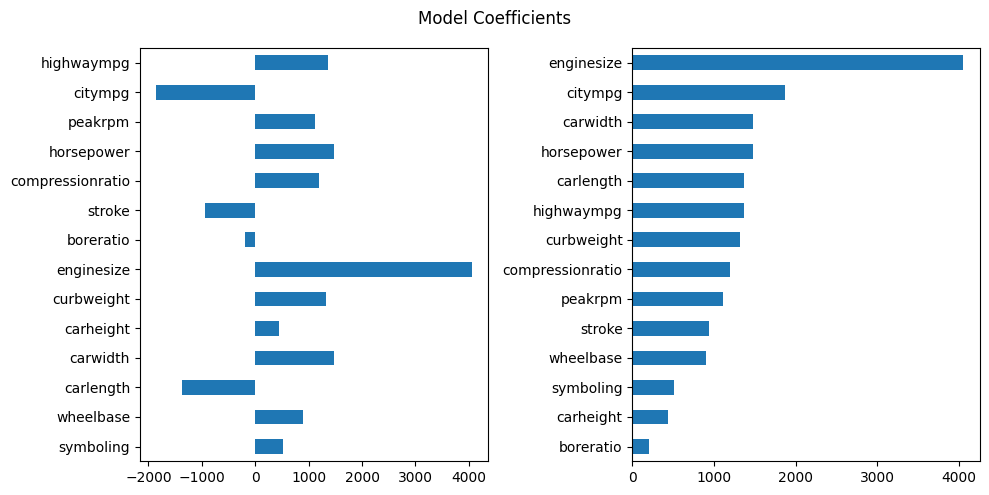

In [17]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef
# def regression_report():
lr = LinearRegression()
lr, y_hat, d_metrics = train_linear_model(lr, X_train, X_test, y_train, y_test, verbose=1)

show_coefs(lr);

Entrenamos 3 modelos:

- Regresión Lineal (OLS)
- Regresión Lasso
- Regresión Ridge
- Regresión ElasticNet

In [59]:
def gs_results(model, grid, X_train, y_train, cv=5, 
               scoring_list=["neg_mean_absolute_error", "r2", "neg_root_mean_squared_error"]):
    
    from sklearn.model_selection import GridSearchCV

    gscv = GridSearchCV(model, grid, cv=cv, scoring=scoring_list, refit=False)
    gscv.fit(X_train, y_train)

    df_results = pd.DataFrame(gscv.cv_results_)#.sort_values(by="rank_test_score")
    df_results.drop(columns=["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time"], inplace=True)
    
    return df_results

def plot_results(df_gs_res, hyperparam, metric, style="*"):
        df_gs_res.set_index("param_"+hyperparam)["mean_test_" + metric].plot(style=style, title=metric)
        plt.xlabel(hyperparam)
        plt.ylabel(metric)
        return plt.gca()
    

elastic = ElasticNet(max_iter=100000000)
grid = {"alpha": [.2],
        "l1_ratio": np.linspace(.1, .9, 20)}

df_res = gs_results(elastic, grid, X_train, y_train)
df_res.head()

,param_alpha,param_l1_ratio,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,...,std_test_r2,rank_test_r2,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,0.2,0.1,"{'alpha': 0.2, 'l1_ratio': 0.1}",-1839.849706,-2574.241000,-2075.307874,-3061.090344,-2558.945659,-2421.886916,426.488508,...,0.067357,20,-2476.602514,-3399.351672,-2947.163842,-4696.774134,-3268.753440,-3357.729120,741.301369,20
1,0.2,0.142105,"{'alpha': 0.2, 'l1_ratio': 0.14210526315789473}",-1842.255166,-2569.712725,-2079.767080,-3055.352399,-2558.112269,-2421.039928,423.013876,...,0.066671,19,-2477.841155,-3389.722545,-2951.250556,-4684.533706,-3265.561124,-3353.781817,736.108508,19
2,0.2,0.184211,"{'alpha': 0.2, 'l1_ratio': 0.1842105263157895}",-1845.942575,-2565.002776,-2084.420734,-3050.644682,-2557.315480,-2420.665249,419.463281,...,0.065955,18,-2479.338792,-3379.981864,-2956.119913,-4672.004329,-3262.464919,-3349.981963,730.677659,17
3,0.2,0.226316,"{'alpha': 0.2, 'l1_ratio': 0.22631578947368422}",-1849.732749,-2560.103526,-2089.305903,-3046.600571,-2556.555018,-2420.459553,416.044905,...,0.065209,17,-2481.131125,-3370.138648,-2961.810824,-4659.172071,-3259.474103,-3346.345354,724.995061,16
4,0.2,0.268421,"{'alpha': 0.2, 'l1_ratio': 0.26842105263157895}",-1853.641906,-2555.006637,-2094.439659,-3042.261105,-2555.826080,-2420.235078,412.464580,...,0.064431,16,-2483.259421,-3360.198218,-2968.394097,-4646.039327,-3256.581652,-3342.894543,719.049204,15


<AxesSubplot: title={'center': 'neg_root_mean_squared_error'}, xlabel='l1_ratio', ylabel='neg_root_mean_squared_error'>

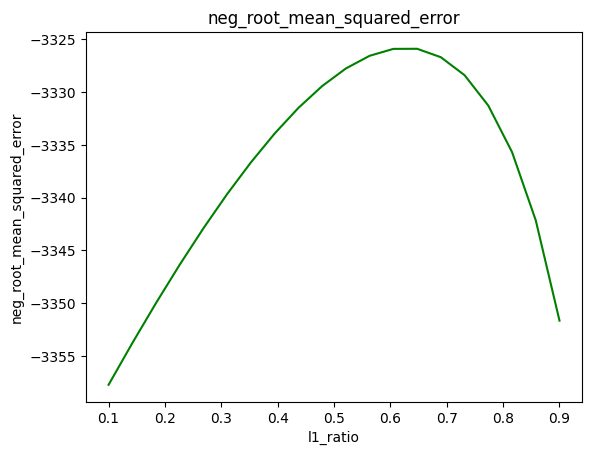

In [62]:
plot_results(df_res, "l1_ratio", "neg_root_mean_squared_error", "g-")

<AxesSubplot: title={'center': 'neg_mean_absolute_error'}, xlabel='l1_ratio', ylabel='neg_mean_absolute_error'>

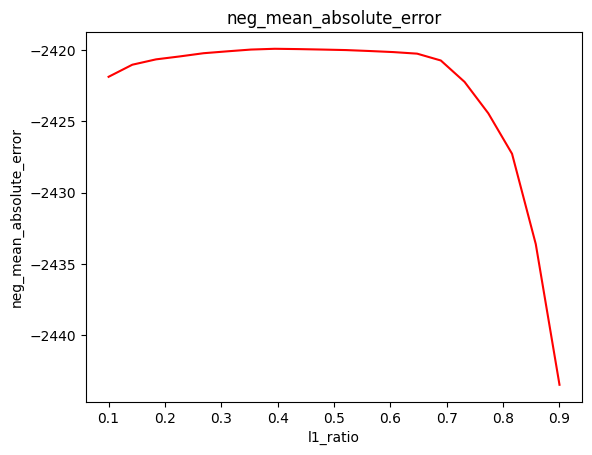

In [61]:
plot_results(df_res, "l1_ratio", "neg_mean_absolute_error", "r-")


<AxesSubplot: xlabel='param_alpha'>

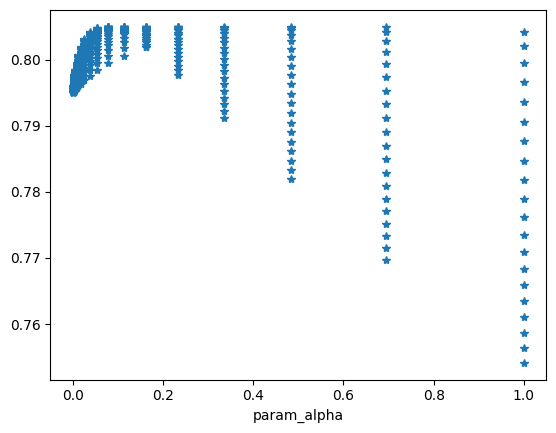

In [44]:
df_res.set_index("param_alpha")["mean_test_score"].plot(style="*")

<AxesSubplot: >

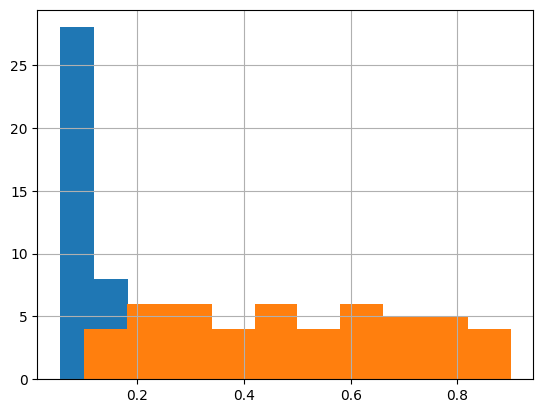

In [37]:
df_res.iloc[:50, :]["param_alpha"].hist(bins=10)
df_res.iloc[:50, :]["param_l1_ratio"].hist(bins=10)

In [86]:
lr = LinearRegression()
lr, y_hat_lr, d_metrics_lr = train_linear_model(lr, X_train, X_test, y_train, y_test, verbose=1)

RMSE: 3779.7191
MAE: 2598.6565
R^2: 0.8154617831891923


<AxesSubplot: title={'center': 'neg_mean_absolute_error'}, xlabel='alpha', ylabel='neg_mean_absolute_error'>

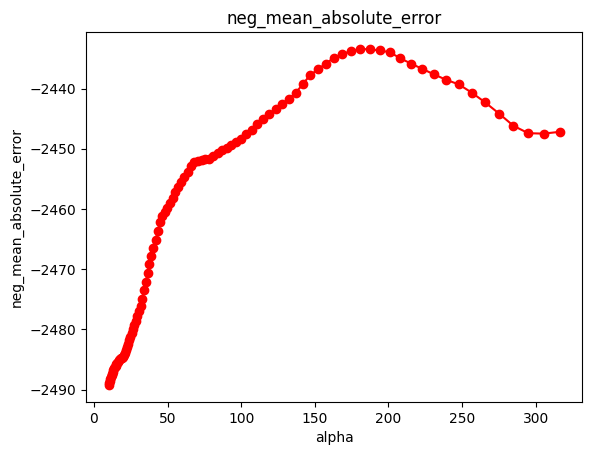

In [68]:
lasso = Lasso()

grid = {"alpha": np.logspace(1, 2.5, 100)}

df_res_lasso = gs_results(lasso, grid, X_train, y_train)

plot_results(df_res_lasso, "alpha", "neg_mean_absolute_error", style="r-o")

<AxesSubplot: title={'center': 'r2'}, xlabel='alpha', ylabel='r2'>

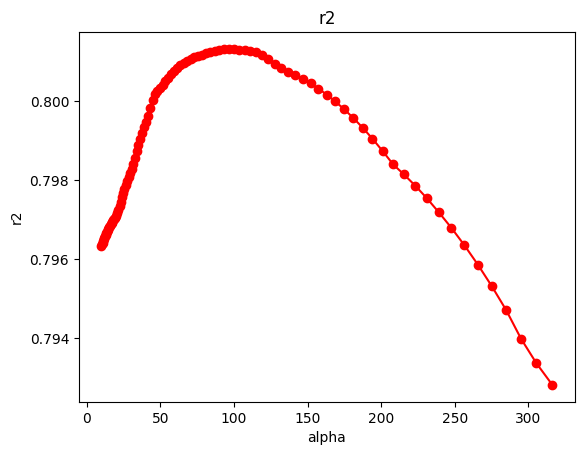

In [69]:
plot_results(df_res_lasso, "alpha", "r2", style="r-o")

<AxesSubplot: title={'center': 'neg_root_mean_squared_error'}, xlabel='alpha', ylabel='neg_root_mean_squared_error'>

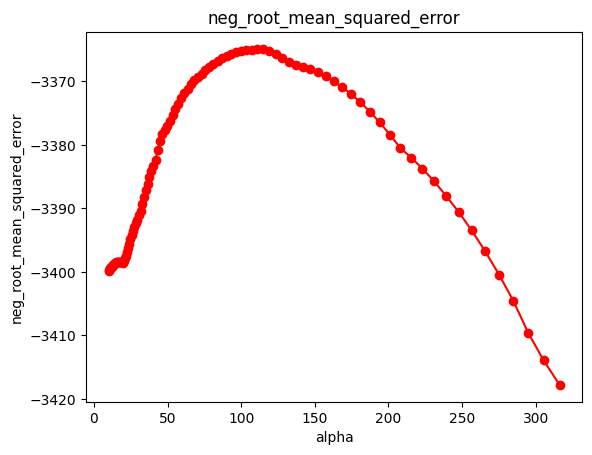

In [70]:
plot_results(df_res_lasso, "alpha", "neg_root_mean_squared_error", style="r-o")

In [87]:
alpha_cand = 125.

lasso_125 = Lasso(alpha=alpha_cand)
lasso_125, y_hat_lasso_125, d_metrics_lasso_125 = train_linear_model(lasso_125, X_train, X_test, y_train, y_test, verbose=1)

RMSE: 3789.7594
MAE: 2644.8003
R^2: 0.8144800829257779


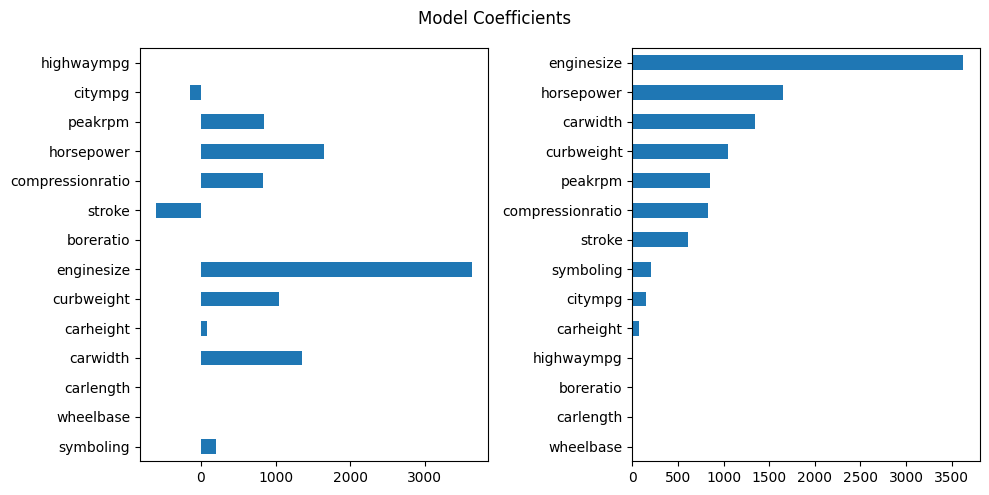

In [77]:
show_coefs(lasso_125);

In [88]:
alpha_cand = 175.

lasso_175 = Lasso(alpha=alpha_cand)
lasso_175, y_hat_lasso_175, d_metrics_lasso_175 = train_linear_model(lasso_175, X_train, X_test, y_train, y_test, verbose=1)

RMSE: 3801.1527
MAE: 2654.5330
R^2: 0.8133629402575586


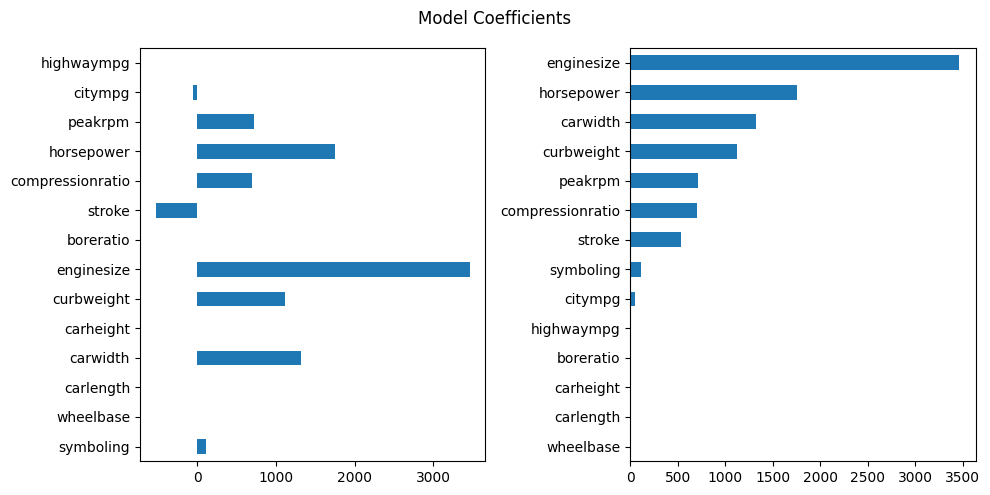

In [78]:
show_coefs(lasso_175);

<AxesSubplot: title={'center': 'neg_mean_absolute_error'}, xlabel='alpha', ylabel='neg_mean_absolute_error'>

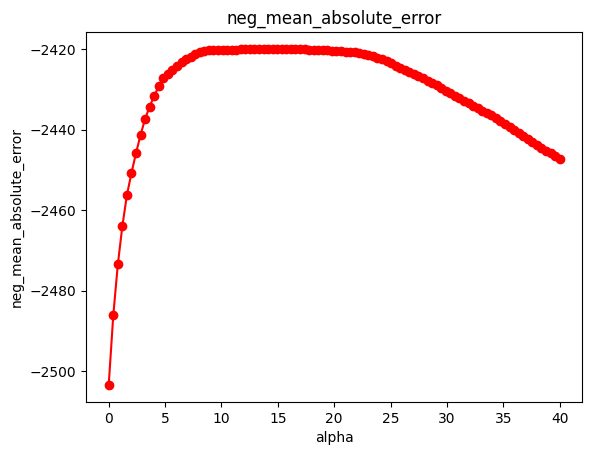

In [82]:
ridge = Ridge()

grid = {"alpha": np.linspace(0, 40, 100)}

df_res_ridge = gs_results(ridge, grid, X_train, y_train)

plot_results(df_res_ridge, "alpha", "neg_mean_absolute_error", style="r-o")

<AxesSubplot: title={'center': 'neg_root_mean_squared_error'}, xlabel='alpha', ylabel='neg_root_mean_squared_error'>

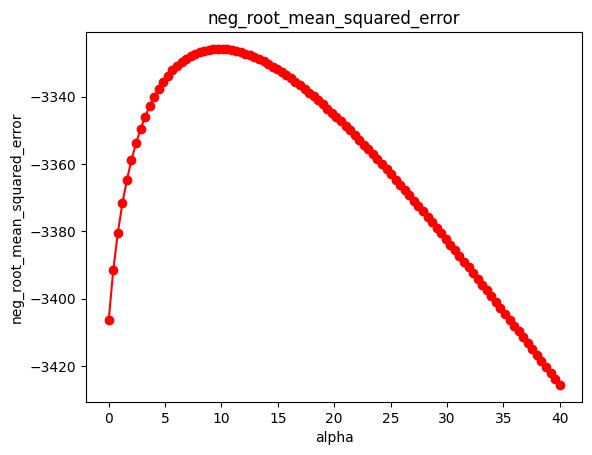

In [83]:
plot_results(df_res_ridge, "alpha", "neg_root_mean_squared_error", style="r-o")

<AxesSubplot: title={'center': 'r2'}, xlabel='alpha', ylabel='r2'>

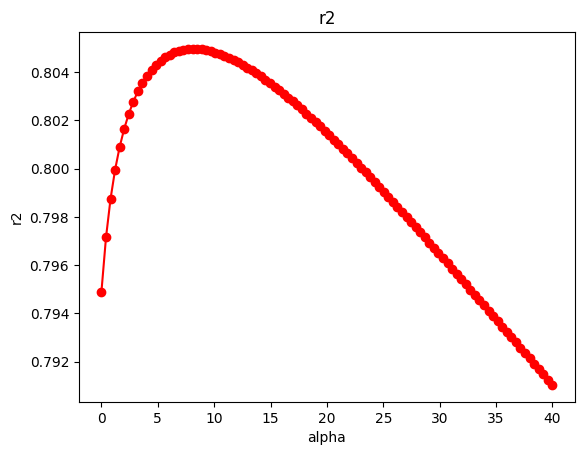

In [84]:
plot_results(df_res_ridge, "alpha", "r2", style="r-o")

In [89]:
ridge = Ridge(alpha=10.)
ridge, y_hat_ridge, d_metrics_ridge = train_linear_model(ridge, X_train, X_test, y_train, y_test, verbose=1)

RMSE: 3862.6708
MAE: 2642.2561
R^2: 0.8072729576097024


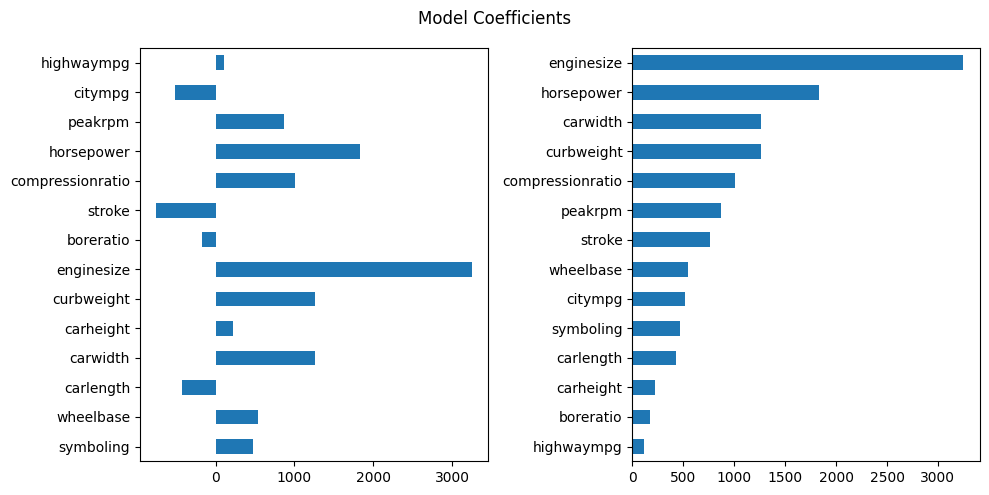

In [90]:
show_coefs(ridge);

In [91]:
elastic = ElasticNet(alpha=0.2, l1_ratio=0.6)
elastic, y_hat_elastic, d_metrics_elastic = train_linear_model(elastic, X_train, X_test, y_train, y_test, verbose=1)

RMSE: 3887.5792
MAE: 2649.6542
R^2: 0.8047793434665166


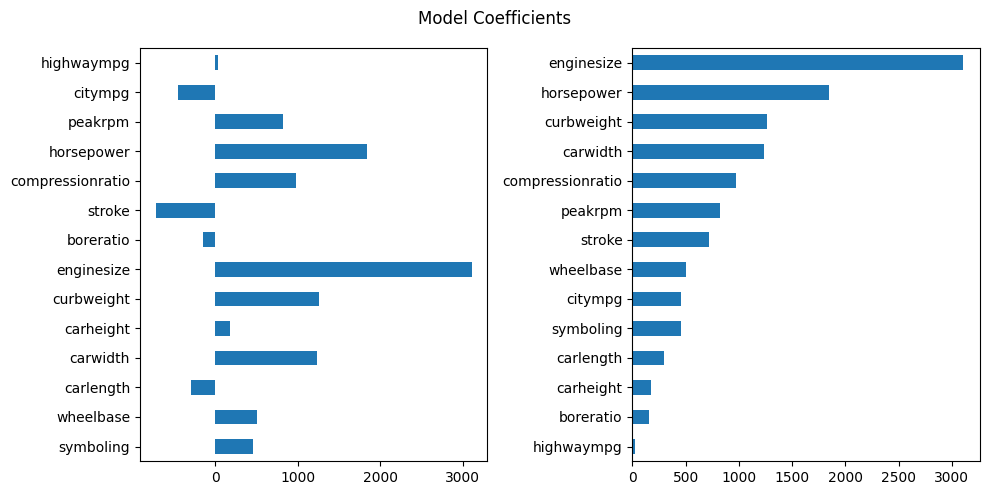

In [92]:
show_coefs(elastic);

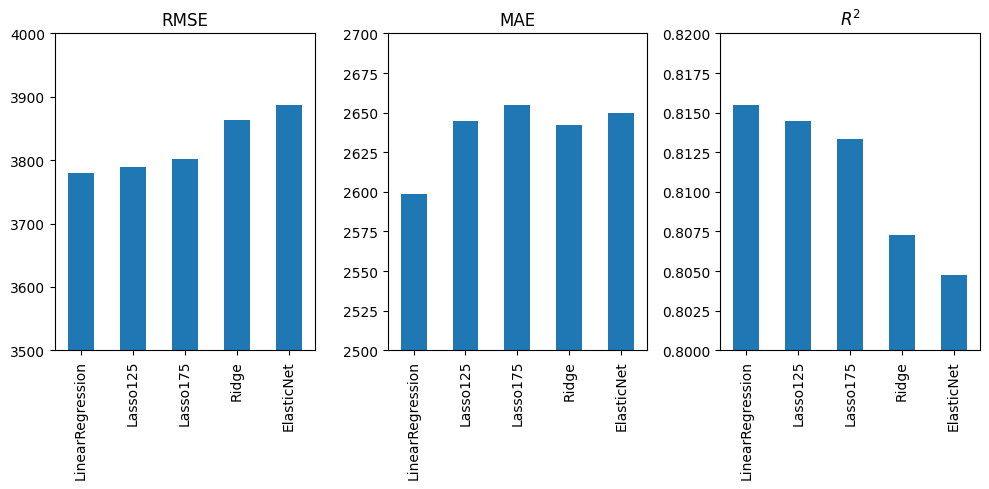

In [106]:
d_metrics_total = {"LinearRegression": d_metrics_lr,
                    "Lasso125": d_metrics_lasso_125,
                    "Lasso175": d_metrics_lasso_175,
                    "Ridge": d_metrics_ridge,
                    "ElasticNet": d_metrics_elastic}

df_res_tot = pd.DataFrame(d_metrics_total).T

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
df_res_tot["RMSE"].plot(kind="bar", ylim=(3500, 4000), ax=ax[0], title="RMSE")
df_res_tot["MAE"].plot(kind="bar", ylim=(2500, 2700), ax=ax[1], title="MAE")
df_res_tot["R2"].plot(kind="bar", ylim=(0.8, 0.82), ax=ax[2], title="$R^2$")

plt.tight_layout()

In [108]:
model = Lasso(alpha=125.)

sc = StandardScaler()

X = df_num.copy().drop(columns=TARGET_NAME)
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
y = df_num.copy()[TARGET_NAME]

model.fit(X, y)

Lasso(alpha=125.0)

,coefs
symboling,65.499516
wheelbase,144.864191
carlength,0.000000
carwidth,996.621454
carheight,145.184458
curbweight,853.323585
enginesize,4356.351419
boreratio,-0.000000
stroke,-674.836343
compressionratio,766.491450


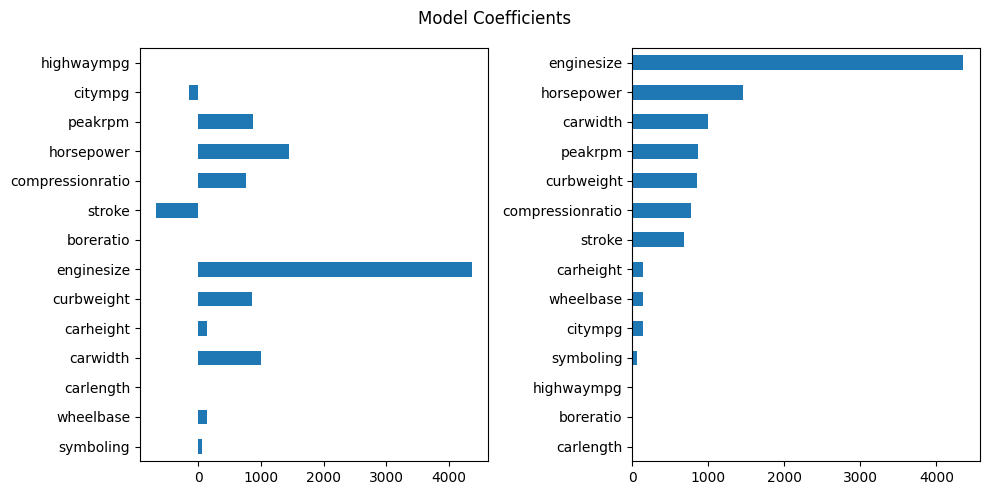

In [111]:
show_coefs(model=model)

In [120]:
df_num.iloc[0].values

array([3.0000e+00, 8.8600e+01, 1.6880e+02, 6.4100e+01, 4.8800e+01,
       2.5480e+03, 1.3000e+02, 3.4700e+00, 2.6800e+00, 9.0000e+00,
       1.1100e+02, 5.0000e+03, 2.1000e+01, 2.7000e+01, 1.3495e+04])

In [115]:
import pickle as pkl

with open("model_lasso_125.pkl", "wb") as f_out:
    pkl.dump(model, f_out)

In [121]:
with open("scaler_model_lasso_125.pkl", "wb") as f_out:
    pkl.dump(sc, f_out)